# Titanic

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## modelos
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

Vamos resolver o desafio do titanic juntos ver quanto acertamos no kaggle. Mas para isso teremos que passar pelas seguintes etapas:

- [X] Carregar os dados
- [X] Inspecionar os dados
- [X] Entender o problema
- [X] Entender os entregáveis
- [X] Tratamento dos dados (valores faltantes e outliers)
- [X] Separação em treino e teste
- [ ] Treinamento
- [ ] Avaliação
- [ ] Retreinamento
- [ ] Scoragem da base de teste
- [ ] Envio


## Carregar os dados

In [5]:
df_raw = pd.read_csv('../data/train.csv')
df_raw.columns = [x.lower() for x in df_raw.columns]
df_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspecionar os dados

1. Analisar dados faltantes

    > a. Remover
    
    > b. Imputar
    
2. Existência de outlier
    
    > a. Remover
    
    > b. Truncamento
    

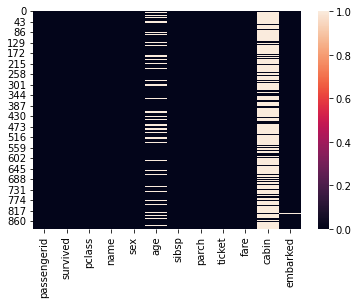

In [10]:
sns.heatmap(df.isna())
plt.show()

In [11]:
(df_raw.isna().sum() / df_raw.shape[0])*100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [12]:
df_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df[df.embarked.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
df_raw[df_raw.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


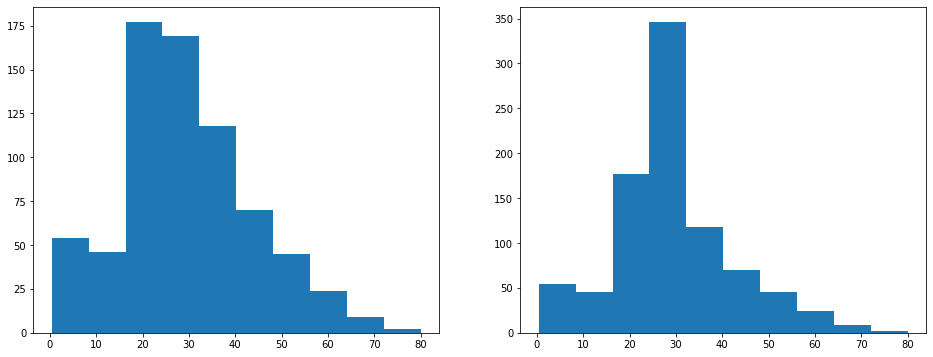

In [33]:
f , ax = plt.subplots(1,2,figsize=(16,6),sharex=True)

ax[0].hist(df_raw.age,label='sem')
ax[1].hist(df_raw.age.fillna(df_raw.age.mean()))

plt.show()

In [37]:
df_processed = (
    df_raw
    .drop(['cabin','ticket','passengerid','name'],axis=1)
    .dropna(subset=['embarked'],how='any')
    .assign(age = lambda x: x.age.fillna(x.age.mean()))
)

df_processed

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


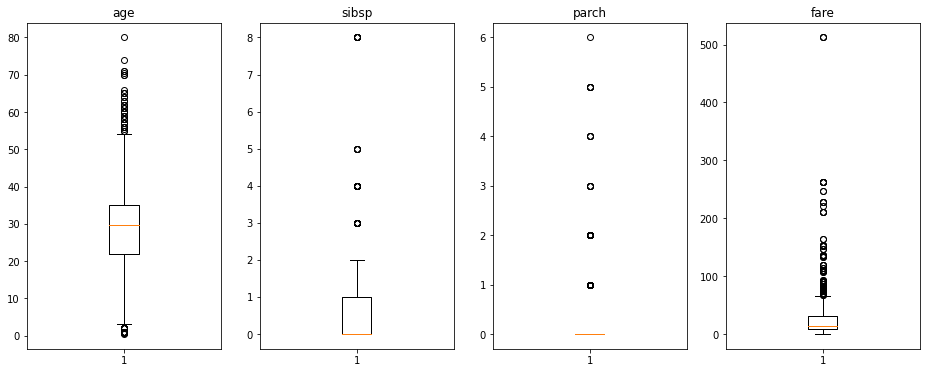

In [44]:
ls_colunas = ['age','sibsp','parch','fare']


f, ax = plt.subplots(1,4,figsize=(16,6))

for idx,coluna in enumerate(ls_colunas):
    ax[idx].boxplot(df_processed[coluna])
    ax[idx].set_title(coluna)

plt.show()

In [52]:
ls_colunas = ['age','sibsp','fare']

def detect_out(column):
    iqr = np.percentile(column,75) - np.percentile(column,25)
    limite_inferior = np.percentile(column,25) - 1.5*iqr
    limite_superior = np.percentile(column,75) + 1.5*iqr
    
    ls_out = []
    
    for value in column:
        if value < limite_inferior:
            ls_out.append(-1)
        elif value > limite_superior:
            ls_out.append(-1)
        else:
            ls_out.append(1)
    
    return np.array(ls_out)

In [111]:
df_analysis = (
    df_processed
    .assign(out_age = lambda x: detect_out(x.age))
    .assign(out_sibsp = lambda x: detect_out(x.sibsp))
    .assign(out_fare = lambda x: detect_out(x.fare))
    .query("out_age != -1 and out_sibsp != -1 and out_fare != -1")
    .drop(['out_age','out_sibsp','out_fare'],axis=1)
    .reset_index()
)

In [112]:
df_analysis.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,2,1,3,female,26.000000,0,0,7.9250,S
2,3,1,1,female,35.000000,1,0,53.1000,S
3,4,0,3,male,35.000000,0,0,8.0500,S
4,5,0,3,male,29.642093,0,0,8.4583,Q


In [113]:
lb = LabelEncoder()
lb.fit(df_analysis.sex)

LabelEncoder()

In [114]:
df_analysis['sex'] = lb.transform(df_analysis.sex)

<AxesSubplot:>

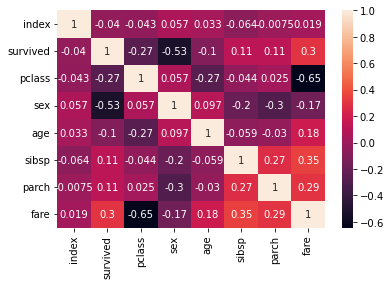

In [115]:
## Analise correlação

sns.heatmap(df_analysis.corr(),annot=True)

In [116]:
def find_velho(value):
    if value > 45:
        return 1
    else:
        return 0

In [117]:
df_analysis['velho'] = df_analysis.age.apply(find_velho)

<AxesSubplot:>

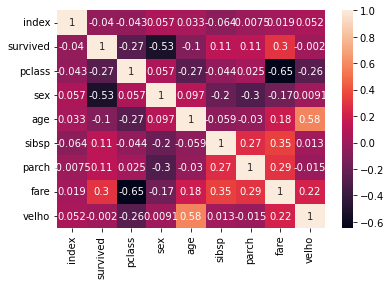

In [118]:
sns.heatmap(df_analysis.corr(),annot=True)

<AxesSubplot:xlabel='survived', ylabel='count'>

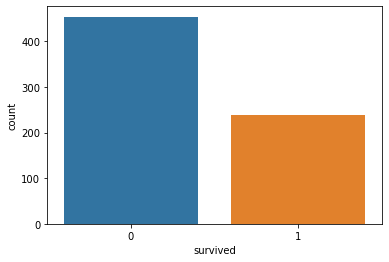

In [119]:
sns.countplot(df_analysis.survived)

## Separação em treino e teste

In [214]:
ohe_embarked_train = OneHotEncoder(sparse=False)
ohe_embarked_train.fit(df_analysis.embarked.values.reshape(-1,1))
embarked_transformed = ohe_embarked_train.transform(df_analysis.embarked.values.reshape(-1,1))
embarked_transformed = pd.DataFrame(embarked_transformed,columns=ohe_embarked_train.get_feature_names())

In [215]:
ohe_pcall_train = OneHotEncoder(sparse=False)
ohe_pcall_train.fit(df_analysis.pclass.values.reshape(-1,1))
pclass_transformed = ohe_pcall_train.transform(df_analysis.pclass.values.reshape(-1,1))
pclass_transformed = pd.DataFrame(pclass_transformed,columns=ohe_pcall_train.get_feature_names())

In [131]:
df_ready_to_train = (
    df_analysis
    .merge(embarked_transformed,left_index=True,right_index=True)
    .merge(pclass_transformed,left_index=True,right_index=True)
    .drop(['index','embarked','pclass'],axis=1)
    
)

df_ready_to_train

,survived,sex,age,sibsp,parch,fare,velho,x0_C,x0_Q,x0_S,x0_1,x0_2,x0_3
0,0,1,22.000000,1,0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,26.000000,0,0,7.9250,0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,35.000000,1,0,53.1000,0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,1,35.000000,0,0,8.0500,0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,1,29.642093,0,0,8.4583,0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0,1,27.000000,0,0,13.0000,0,0.0,0.0,1.0,0.0,1.0,0.0
688,1,0,19.000000,0,0,30.0000,0,0.0,0.0,1.0,1.0,0.0,0.0
689,0,0,29.642093,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0
690,1,1,26.000000,0,0,30.0000,0,1.0,0.0,0.0,1.0,0.0,0.0


In [183]:
x = df_ready_to_train.drop(['survived'],axis=1)
y = df_ready_to_train.survived

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
x_train.shape,y_train.shape

((553, 12), (553,))

In [143]:
x_test.shape,y_test.shape

((139, 12), (139,))

## Treinamento

### Dummy

In [146]:
dm = DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)

DummyClassifier(strategy='most_frequent')

In [150]:
dm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [151]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1])

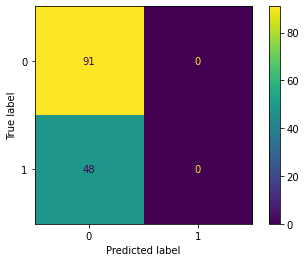

In [154]:
plot_confusion_matrix(dm,x_test,y_test)
plt.show()

In [156]:
print(classification_report(y_test,dm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        91
           1       0.00      0.00      0.00        48

    accuracy                           0.65       139
   macro avg       0.33      0.50      0.40       139
weighted avg       0.43      0.65      0.52       139



### DecisionTree

In [158]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

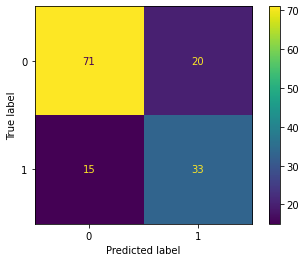

In [159]:
plot_confusion_matrix(dt,x_test,y_test)
plt.show()

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        91
           1       0.62      0.69      0.65        48

    accuracy                           0.75       139
   macro avg       0.72      0.73      0.73       139
weighted avg       0.76      0.75      0.75       139



<BarContainer object of 12 artists>

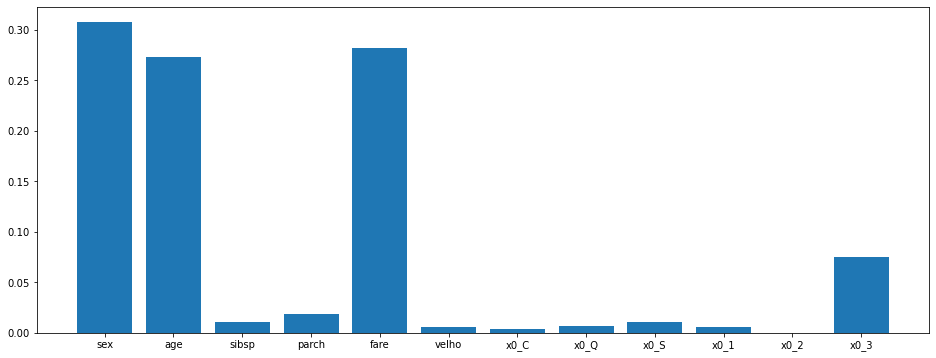

In [168]:
f ,ax = plt.subplots(1,1,figsize=(16,6))

ax.bar(x_train.columns,dt.feature_importances_)

## SVC

In [192]:
for coluna in x_train.columns:
    mm = MinMaxScaler()
    mm.fit(x_train[coluna].values.reshape(-1,1))
    x_train[coluna] = mm.transform(x_train[coluna].values.reshape(-1,1))
    x_test[coluna] = mm.transform(x_test[coluna].values.reshape(-1,1))

In [193]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

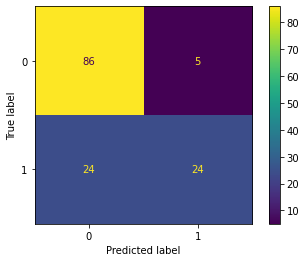

In [194]:
plot_confusion_matrix(svc,x_test,y_test)
plt.show()

In [195]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        91
           1       0.83      0.50      0.62        48

    accuracy                           0.79       139
   macro avg       0.80      0.72      0.74       139
weighted avg       0.80      0.79      0.78       139



## Logistic Regression

In [196]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

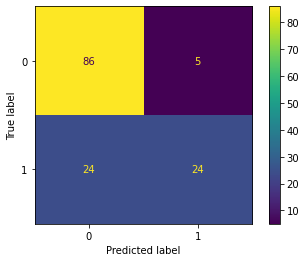

In [197]:
plot_confusion_matrix(svc,x_test,y_test)
plt.show()

In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        91
           1       0.74      0.65      0.69        48

    accuracy                           0.80       139
   macro avg       0.78      0.76      0.77       139
weighted avg       0.79      0.80      0.80       139



## Retreinamento

## Scoragem da base de teste

In [203]:
x_train.head()

,sex,age,sibsp,parch,fare,velho,x0_C,x0_Q,x0_S,x0_1,x0_2,x0_3
110,0.0,0.411765,0.5,0.000000,0.243846,0.0,0.0,0.0,1.0,0.0,0.0,1.0
82,1.0,0.686275,0.0,0.000000,0.121474,0.0,0.0,0.0,1.0,0.0,0.0,1.0
51,1.0,0.450980,1.0,0.000000,0.133269,0.0,0.0,0.0,1.0,0.0,0.0,1.0
218,1.0,0.588235,0.0,0.000000,0.133269,0.0,1.0,0.0,0.0,0.0,0.0,1.0
554,0.0,0.058824,0.0,0.166667,0.507692,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [237]:
df = pd.read_csv('../data/test.csv')
df.columns = [x.lower() for x in df.columns]

In [212]:
colunas = list(x_train.columns[:5])+['pclass','embarked']

feats = df[colunas]
feats

,sex,age,sibsp,parch,fare,pclass,embarked
0,male,34.5,0,0,7.8292,3,Q
1,female,47.0,1,0,7.0000,3,S
2,male,62.0,0,0,9.6875,2,Q
3,male,27.0,0,0,8.6625,3,S
4,female,22.0,1,1,12.2875,3,S
...,...,...,...,...,...,...,...
413,male,NaN,0,0,8.0500,3,S
414,female,39.0,0,0,108.9000,1,C
415,male,38.5,0,0,7.2500,3,S
416,male,NaN,0,0,8.0500,3,S


In [218]:
pclass = pd.DataFrame(ohe_pcall_train.transform(feats.pclass.values.reshape(-1,1)),columns=ohe_pcall_train.get_feature_names())
embarked = pd.DataFrame(ohe_embarked_train.transform(feats.embarked.values.reshape(-1,1)),columns=ohe_embarked_train.get_feature_names())

In [243]:
mm = MinMaxScaler()

to_transform = (
    feats
    .assign(age = lambda x: x.age.fillna(x.age.mean()))
    .assign(fare = lambda x: x.fare.fillna(x.fare.mean()))
    .assign(velho = lambda x: x.age.apply(find_velho))
    .merge(embarked,left_index=True,right_index=True)
    .merge(pclass,left_index=True,right_index=True)
    .drop(['pclass','embarked'],axis=1)
    .assign(sex = lambda x: lb.transform(x.sex))
)


for coluna in to_transform.columns:
    mm.fit(to_transform[coluna].values.reshape(-1,1))
    to_transform[coluna] = mm.transform(to_transform[coluna].values.reshape(-1,1))

In [251]:
(
    pd.DataFrame(lr.predict(to_transform),columns=['Survived'])
    .assign(Passengerid = df.passengerid)
    .loc[:,['Passengerid','Survived']]
    .to_csv('submission06102021.csv',index=False,header=True,sep=',')
)